<a href="https://colab.research.google.com/github/svetlanama/LendingClub/blob/main/lending_club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Data

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

python_material_folder_name = "python-material"

try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True
except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."


df = pd.read_csv(f"drive/MyDrive/AI/PUBLIC_CSV/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")

df.head()

Mounted at /content/drive


,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

# 2. Data preparation & Cleaning

## a) Handling missing values

In [3]:

# 1. Show total missing values per column
missing_per_column = df.isna().sum()
print(missing_per_column)


Unnamed: 0.1                                      0
Unnamed: 0                                        0
id                                                0
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      8954
emp_length                                     6950
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url         

In [4]:

#  2. Show only columns with missing values
missing_columns = df.columns[df.isna().any()]
print(df[missing_columns].isna().sum())


emp_title                                      8954
emp_length                                     6950
title                                           780
dti                                             102
mths_since_last_delinq                        52814
mths_since_last_record                        85370
revol_util                                       81
last_pymnt_d                                    191
next_pymnt_d                                  63573
last_credit_pull_d                                2
collections_12_mths_ex_med                        6
mths_since_last_major_derog                   75398
annual_inc_joint                              92834
dti_joint                                     92834
verification_status_joint                     93369
tot_coll_amt                                   2438
tot_cur_bal                                    2438
open_acc_6m                                   29644
open_act_il                                   29644
open_il_12m 

In [5]:

# 3. Total number of missing values in the entire DataFrame
total_missing = df.isna().sum().sum()
print(f"Total missing values: {total_missing}")


Total missing values: 3691270


In [6]:
# 4. Show percentage of missing values per column
missing_percent = df.isna().mean() * 100
print(missing_percent[missing_percent > 0])

emp_title                                      8.954
emp_length                                     6.950
title                                          0.780
dti                                            0.102
mths_since_last_delinq                        52.814
mths_since_last_record                        85.370
revol_util                                     0.081
last_pymnt_d                                   0.191
next_pymnt_d                                  63.573
last_credit_pull_d                             0.002
collections_12_mths_ex_med                     0.006
mths_since_last_major_derog                   75.398
annual_inc_joint                              92.834
dti_joint                                     92.834
verification_status_joint                     93.369
tot_coll_amt                                   2.438
tot_cur_bal                                    2.438
open_acc_6m                                   29.644
open_act_il                                   

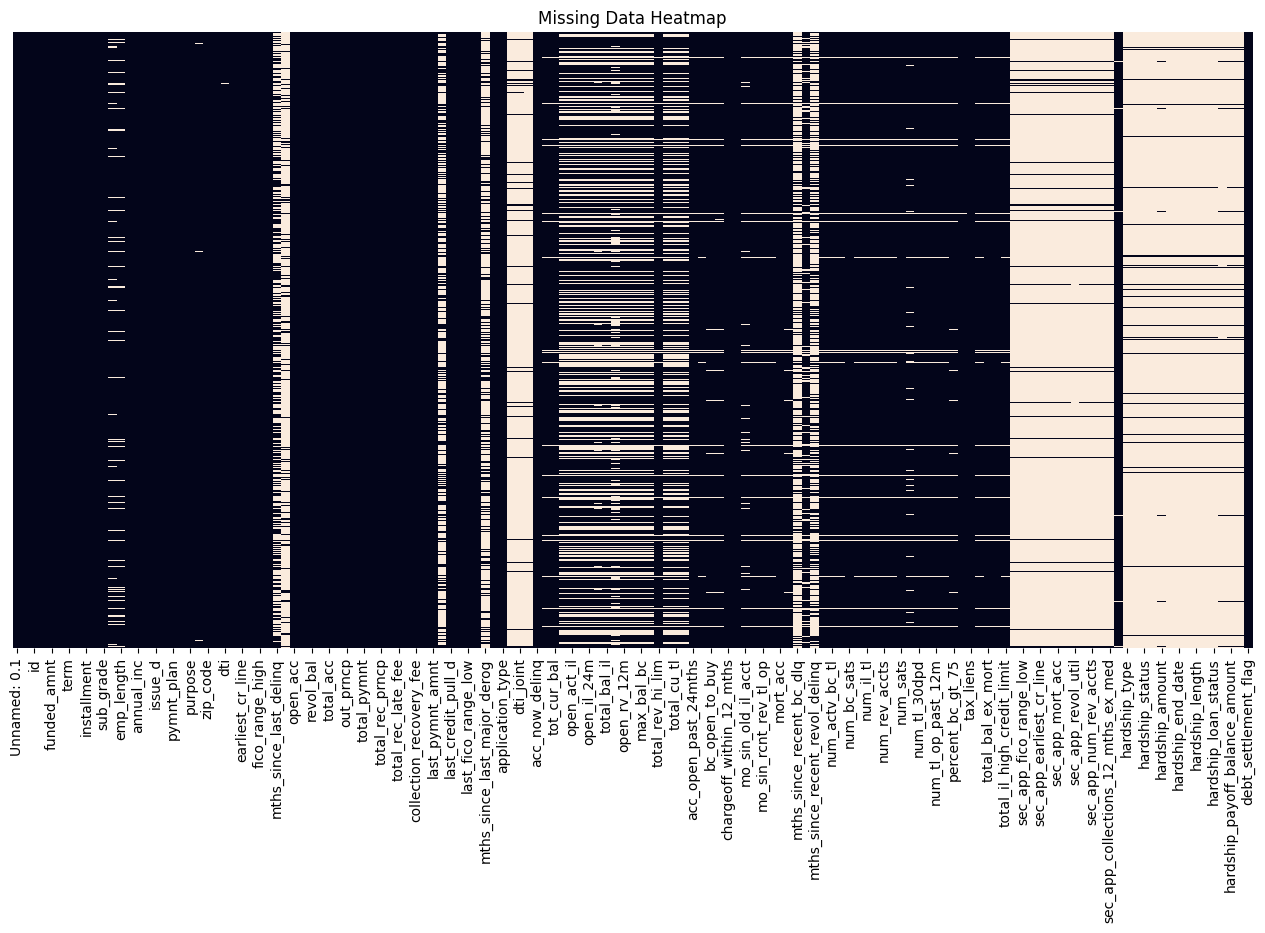

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [8]:
#Drop Columns with Too Many Missing Values (e.g., > 80%)
threshold = 0.8  # 80%
to_drop = df.columns[df.isna().mean() > threshold]
print(f"Columns to drop (>{int(threshold * 100)}% missing):\n{to_drop}")

df_cleaned = df.drop(columns=to_drop)

Columns to drop (>80% missing):
Index(['mths_since_last_record', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object')


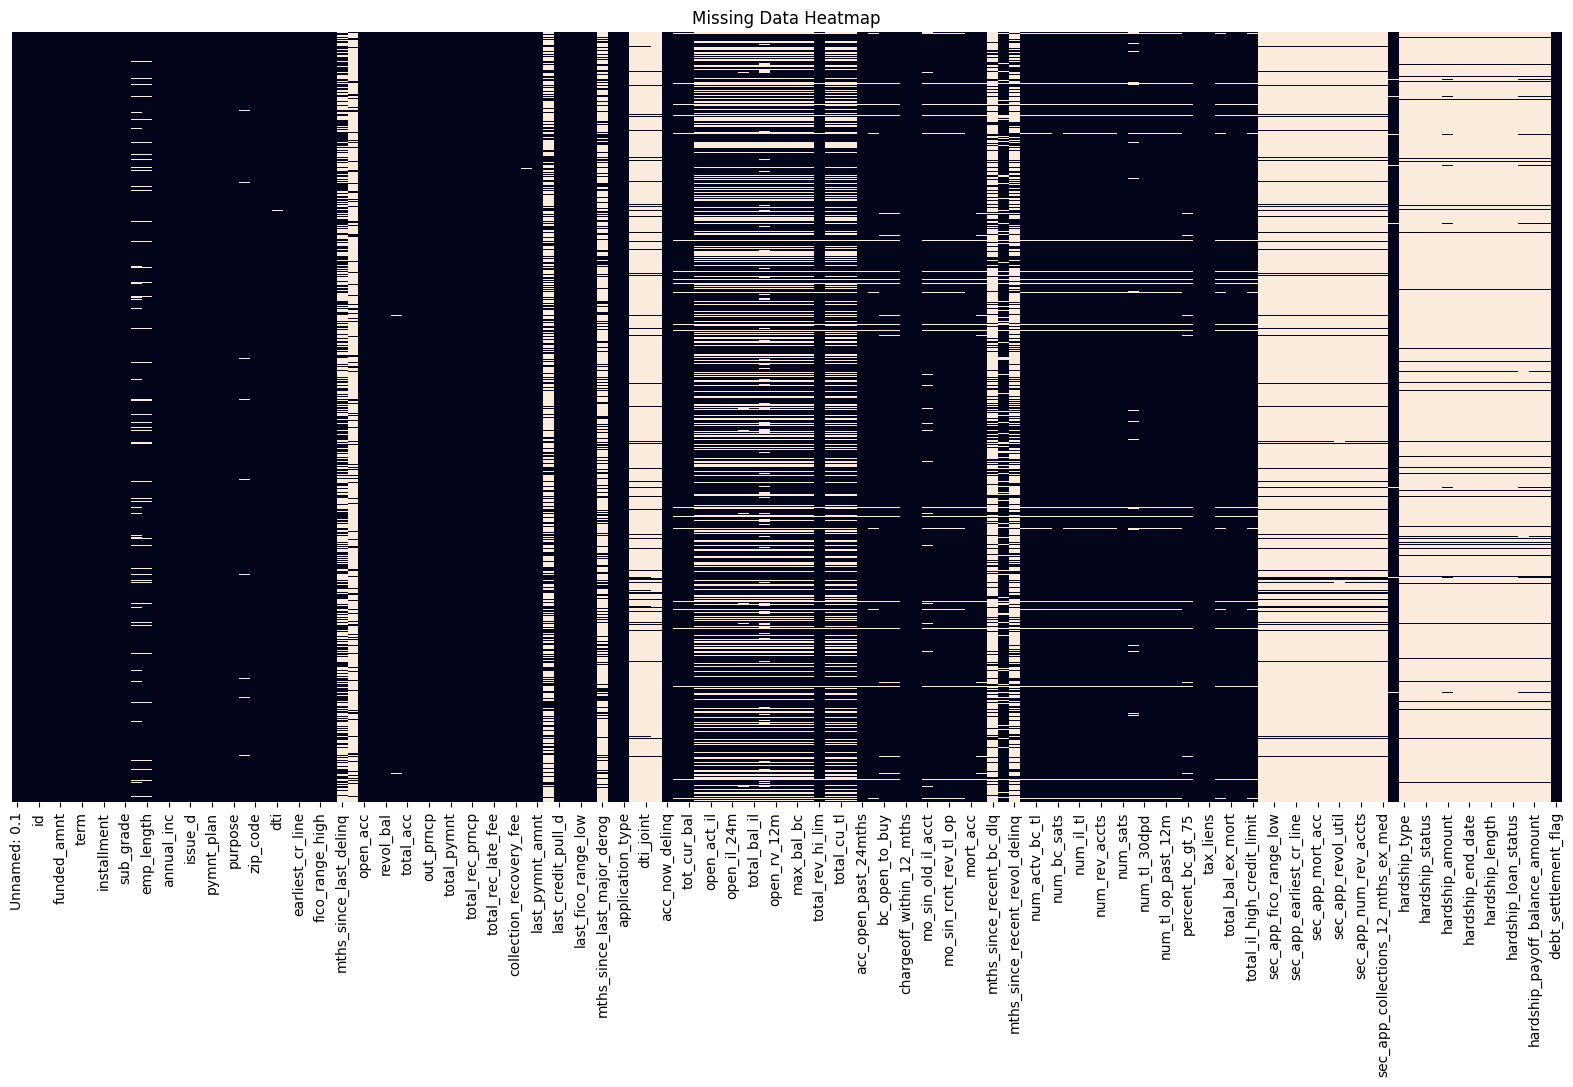

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Fill Missing Values

In [10]:
# Fill numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True) # df.fillna(0, inplace=True)




In [ ]:
# For categorical columns, fill with mode
# for col in df.select_dtypes(include=['object']):
#     if not df[col].mode().empty:
#         df[col].fillna(df[col].mode()[0], inplace=True)


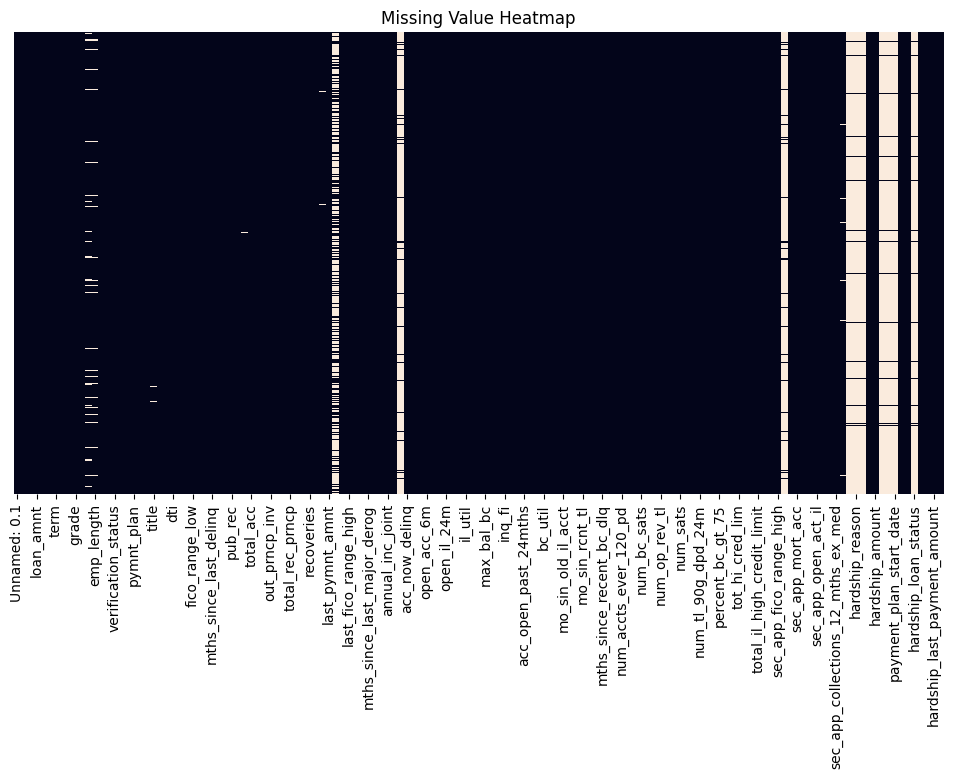

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

In [12]:

# 3. Total number of missing values in the entire DataFrame
total_missing = df.isna().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 934233


# Converting data types to appropriate formats





Check Current Data Types

In [13]:
print(df.dtypes)

Unnamed: 0.1                                    int64
Unnamed: 0                                      int64
id                                              int64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                  

Convert Columns to Numeric

In [14]:
columns_to_numeric = ['annual_inc_joint', 'dti_joint', 'tot_cur_bal', 'bc_util', 'revol_util']

for col in columns_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# . Convert Date Columns

In [15]:
date_columns = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_start_date', 'hardship_end_date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

<ipython-input-15-080086e88107>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-15-080086e88107>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-15-080086e88107>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-15-080086e88107>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-

# Convert Categorical Columns to category Type

In [16]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert Boolean-like Columns

In [17]:
bool_columns = ['hardship_flag', 'debt_settlement_flag']

df[bool_columns] = df[bool_columns].apply(lambda col: col.map({'Y': True, 'N': False}))


In [18]:
print(df.dtypes)  # check new types
print(df.memory_usage(deep=True))  # check memory savings

Unnamed: 0.1                                           int64
Unnamed: 0                                             int64
id                                                     int64
loan_amnt                                            float64
funded_amnt                                          float64
funded_amnt_inv                                      float64
term                                                category
int_rate                                            category
installment                                          float64
grade                                               category
sub_grade                                           category
emp_title                                           category
emp_length                                          category
home_ownership                                      category
annual_inc                                           float64
verification_status                                 category
issue_d                 

# Removing duplicate records

 1.Check for Duplicates

In [19]:
# Check how many duplicates exist
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#  *  Detecting Outliers





a) Define potential outlier

In [20]:
# Numeric Columns with High Variance / Range
numeric_cols = df.select_dtypes(include='number')

# Get the range (max - min) of each numeric column
ranges = numeric_cols.max() - numeric_cols.min()
ranges = ranges.sort_values(ascending=False)

# Show top N columns with the largest range
top_range_cols = ranges.head(10).index.tolist()
print("Top columns with wide range (potential outliers):")
print(top_range_cols)

Top columns with wide range (potential outliers):
['id', 'annual_inc', 'tot_hi_cred_lim', 'tot_cur_bal', 'Unnamed: 0.1', 'total_rev_hi_lim', 'total_bal_ex_mort', 'revol_bal', 'annual_inc_joint', 'total_il_high_credit_limit']


In [21]:
# Columns with Skewed Distribution
skewness = numeric_cols.skew().sort_values(ascending=False)
high_skew_cols = skewness[abs(skewness) > 1].index.tolist()

print("Highly skewed columns (potential outliers):")
print(high_skew_cols)

Highly skewed columns (potential outliers):
['delinq_amnt', 'sec_app_chargeoff_within_12_mths', 'num_tl_120dpd_2m', 'annual_inc', 'tax_liens', 'hardship_last_payment_amount', 'tot_coll_amt', 'sec_app_collections_12_mths_ex_med', 'dti', 'num_tl_30dpd', 'orig_projected_additional_accrued_interest', 'acc_now_delinq', 'total_rec_late_fee', 'chargeoff_within_12_mths', 'pub_rec', 'revol_bal_joint', 'hardship_dpd', 'num_tl_90g_dpd_24m', 'hardship_length', 'deferral_term', 'sec_app_open_act_il', 'annual_inc_joint', 'hardship_amount', 'collections_12_mths_ex_med', 'sec_app_inq_last_6mths', 'collection_recovery_fee', 'recoveries', 'revol_bal', 'sec_app_num_rev_accts', 'sec_app_mort_acc', 'sec_app_open_acc', 'num_accts_ever_120_pd', 'delinq_2yrs', 'hardship_payoff_balance_amount', 'total_rev_hi_lim', 'mo_sin_rcnt_tl', 'mths_since_rcnt_il', 'total_bal_il', 'total_cu_tl', 'open_act_il', 'avg_cur_bal', 'bc_open_to_buy', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc', 'total_bal_ex_mort', 'pub_rec_b

In [22]:
# Columns with Few Unique Values → Skip
unique_counts = numeric_cols.nunique()
likely_not_useful = unique_counts[unique_counts < 10].index.tolist()

print("Columns with very few unique values (probably skip):")
print(likely_not_useful)

Columns with very few unique values (probably skip):
['revol_util', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'pub_rec_bankruptcies', 'sec_app_inq_last_6mths', 'sec_app_collections_12_mths_ex_med', 'deferral_term', 'hardship_length']


In [23]:
potential_outlier_cols = list(set(high_skew_cols + top_range_cols) - set(likely_not_useful))

print("Recommended columns to visualize for outliers:")
print(potential_outlier_cols)

Recommended columns to visualize for outliers:
['total_bc_limit', 'mths_since_recent_revol_delinq', 'num_actv_bc_tl', 'pct_tl_nvr_dlq', 'annual_inc', 'tot_hi_cred_lim', 'total_rec_int', 'sec_app_open_act_il', 'num_actv_rev_tl', 'out_prncp', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m', 'num_rev_tl_bal_gt_0', 'orig_projected_additional_accrued_interest', 'revol_bal_joint', 'total_rec_prncp', 'tot_cur_bal', 'tax_liens', 'hardship_last_payment_amount', 'collection_recovery_fee', 'inq_fi', 'last_fico_range_low', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_tl', 'inq_last_6mths', 'hardship_dpd', 'sec_app_open_acc', 'mths_since_last_record', 'num_bc_sats', 'mths_since_recent_bc', 'revol_bal', 'fico_range_high', 'open_rv_12m', 'sec_app_num_rev_accts', 'total_rev_hi_lim', 'acc_open_past_24mths', 'Unnamed: 0', 'open_act_il', 'dti_joint', 'hardship_amount', 'total_pymnt_inv', 'tot_coll_amt', 'num_rev_accts', 'num_op_rev_tl', 'sec_app_revol_util', 'annual_inc_joint', 'dti', 'total_bal_il', 'total_cu_tl', '

In [24]:
# Using the IQR (Interquartile Range) Method:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]




columns_to_check = ['annual_inc', 'dti', 'revol_bal']

for col in columns_to_check:
    outliers = detect_outliers_iqr(df, col)
    print(f"Number of outliers in annual_inc: {len(outliers)}")


Number of outliers in annual_inc: 5205
Number of outliers in annual_inc: 1306
Number of outliers in annual_inc: 6127


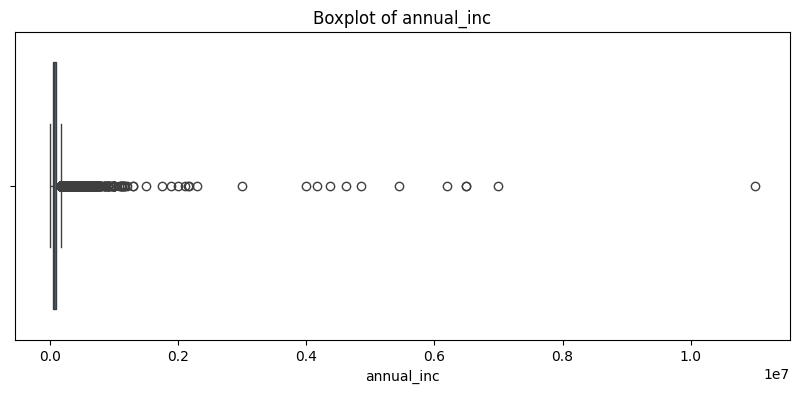

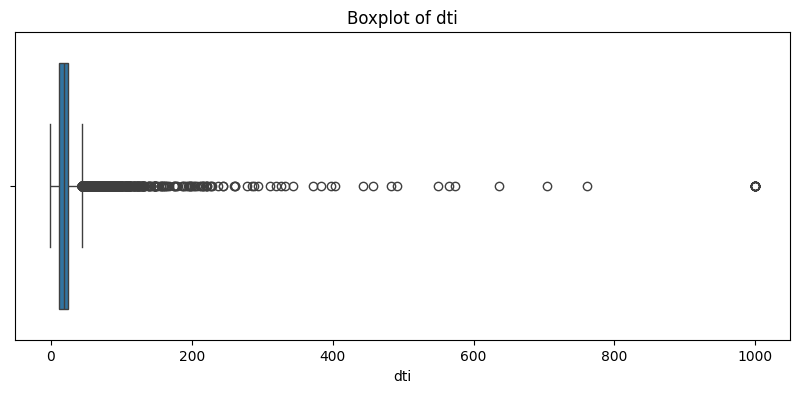

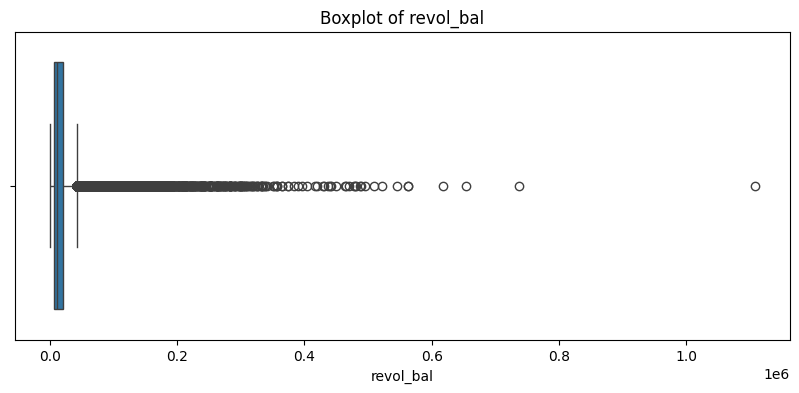

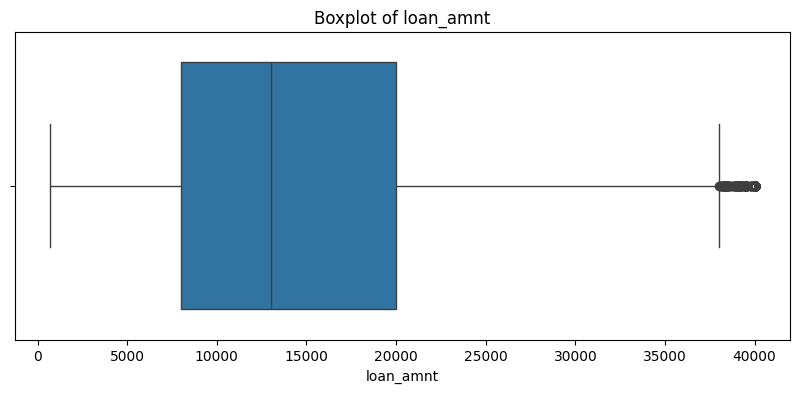

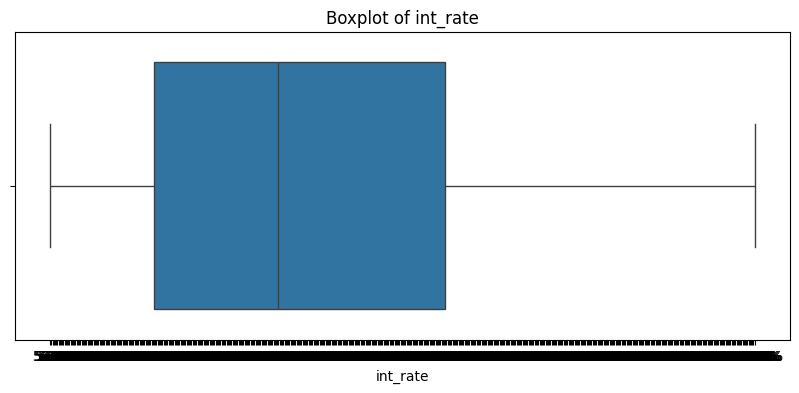

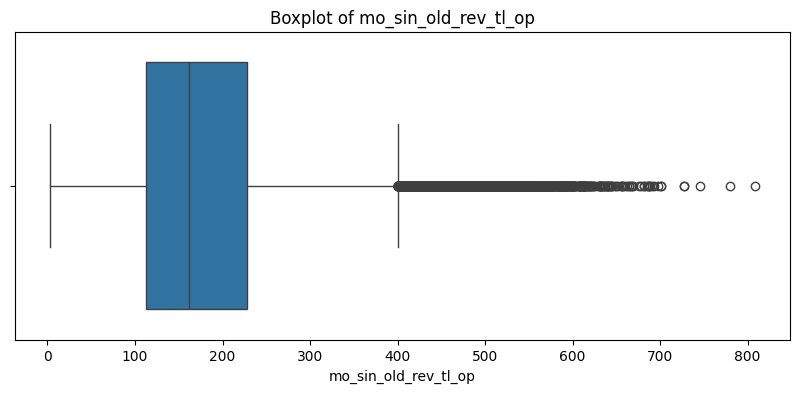

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['annual_inc', 'dti', 'revol_bal', 'loan_amnt', 'int_rate', 'mo_sin_old_rev_tl_op']

for col in columns_to_plot:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

ValueError: List of boxplot statistics and `positions` values must have same the length

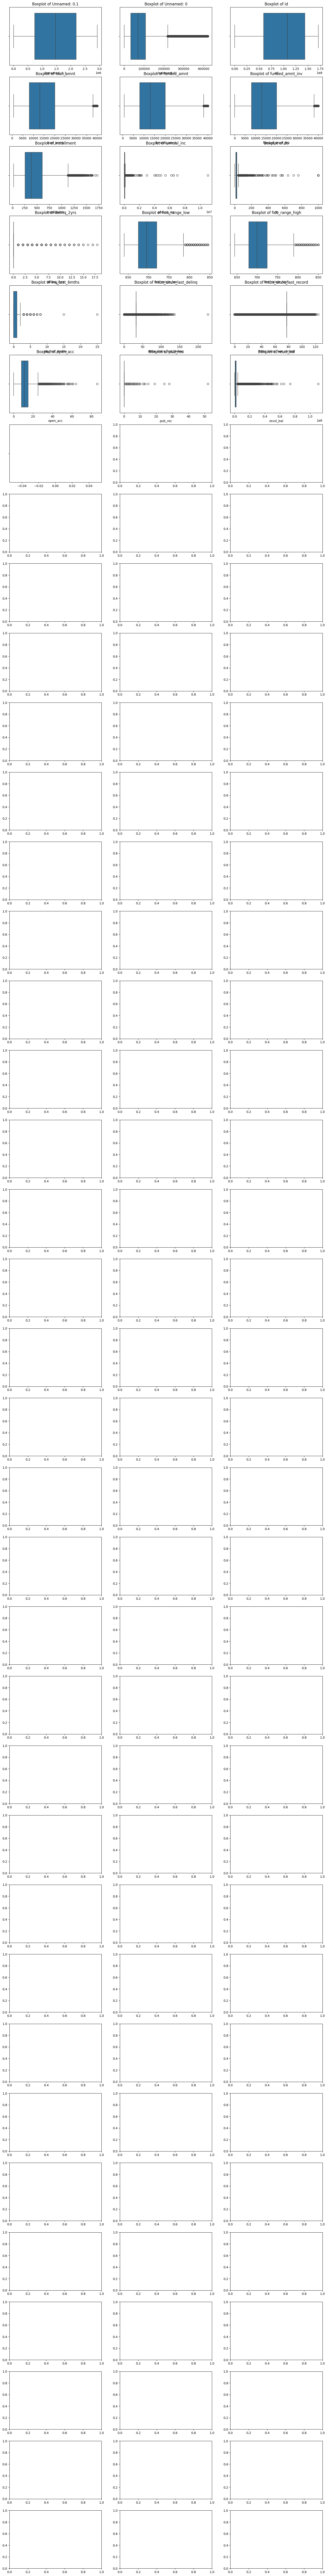

In [37]:
import math

numeric_cols = df.select_dtypes(include='number').columns
n = len(numeric_cols)

# Set up grid layout
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

*   Standardizing and normalizing data




# Technique	Description	When to Use
*  Standardization	Rescales data to have mean = 0 and std = 1	Often used for
linear models, PCA
*  Normalization	Rescales data to [0, 1] range	Good for distance-based models (e.g. KNN, clustering)


In [38]:
numeric_cols = df.select_dtypes(include='number')

# Get the range (max - min) of each numeric column
ranges = numeric_cols.max() - numeric_cols.min()
ranges = ranges.sort_values(ascending=False)

# Show top N columns with the largest range
top_range_cols = ranges.head(10).index.tolist()
print("Top columns with wide range (potential outliers):")
print(top_range_cols)

Top columns with wide range (potential outliers):
['id', 'annual_inc', 'tot_hi_cred_lim', 'tot_cur_bal', 'Unnamed: 0.1', 'total_rev_hi_lim', 'total_bal_ex_mort', 'revol_bal', 'annual_inc_joint', 'total_il_high_credit_limit']


In [39]:
# 2. Columns with Skewed Distribution
skewness = numeric_cols.skew().sort_values(ascending=False)
high_skew_cols = skewness[abs(skewness) > 1].index.tolist()

print("Highly skewed columns (potential outliers):")
print(high_skew_cols)

Highly skewed columns (potential outliers):
['delinq_amnt', 'sec_app_chargeoff_within_12_mths', 'num_tl_120dpd_2m', 'annual_inc', 'tax_liens', 'hardship_last_payment_amount', 'tot_coll_amt', 'sec_app_collections_12_mths_ex_med', 'dti', 'num_tl_30dpd', 'orig_projected_additional_accrued_interest', 'acc_now_delinq', 'total_rec_late_fee', 'chargeoff_within_12_mths', 'pub_rec', 'revol_bal_joint', 'hardship_dpd', 'num_tl_90g_dpd_24m', 'hardship_length', 'deferral_term', 'sec_app_open_act_il', 'annual_inc_joint', 'hardship_amount', 'collections_12_mths_ex_med', 'sec_app_inq_last_6mths', 'collection_recovery_fee', 'recoveries', 'revol_bal', 'sec_app_num_rev_accts', 'sec_app_mort_acc', 'sec_app_open_acc', 'num_accts_ever_120_pd', 'delinq_2yrs', 'hardship_payoff_balance_amount', 'total_rev_hi_lim', 'mo_sin_rcnt_tl', 'mths_since_rcnt_il', 'total_bal_il', 'total_cu_tl', 'open_act_il', 'avg_cur_bal', 'bc_open_to_buy', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc', 'total_bal_ex_mort', 'pub_rec_b

In [40]:
unique_counts = numeric_cols.nunique()
likely_not_useful = unique_counts[unique_counts < 10].index.tolist()

print("Columns with very few unique values (probably skip):")
print(likely_not_useful)

Columns with very few unique values (probably skip):
['revol_util', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'pub_rec_bankruptcies', 'sec_app_inq_last_6mths', 'sec_app_collections_12_mths_ex_med', 'deferral_term', 'hardship_length']


In [78]:
# Ensure Only Numeric Columns with No NaNs

numeric_cols = df.select_dtypes(include='number').columns
print("Numeric Columns:")
print(numeric_cols)
# print("First 5 numeric columns:", list(numeric_cols[:5]))

# print("-----------")
# df_numeric_cleaned = df[numeric_cols].dropna()
df_numeric_cleaned = df[numeric_cols].fillna(df[numeric_cols].median())
print("Numeric Columns Cleaned:")
# print(numeric_cols)
print("Numeric Cleaned (1st row):", df_numeric_cleaned.head(1))

Numeric Columns:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       ...
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'deferral_term',
       'hardship_amount', 'hardship_length', 'hardship_dpd',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object', length=110)
Numeric Columns Cleaned:
Numeric Cleaned (1st row):    Unnamed: 0.1  Unnamed: 0         id  loan_amnt  funded_amnt  \
0       1746494       25450  167338079     4000.0       4000.0   

   funded_amnt_inv  installment  annual_inc    dti  delinq_2yrs  \
0           4000.0       134.93     48000.0  20.25          1.0   

   fico_range_low  fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0           665.0            669.0             0.0                    19.0

In [79]:
null_columns = df_numeric_cleaned.columns[df_numeric_cleaned.isna().any()]
print("Columns still containing NaNs:", null_columns.tolist())

Columns still containing NaNs: ['revol_util']


In [80]:
df_numeric_cleaned[null_columns] = df_numeric_cleaned[null_columns].fillna(0)

df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,2020-03-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,NaN,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,2020-05-01,134.93,2020-06-01,2020-05-01,669.0,665.0,1.0,45.0,1.0,Individual,115000.0,18.895,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,6262.5,57.3,0.0,0.0,179.0,75.0,38.0,16.0,2.0,14.0,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,33.3,1.0,0.0,395328.0,11948.0,0.0,17928.0,28527.0,675.0,679.0,NaN,0.0,1.0,11.0,58.0,2.0,11.0,0.0,0.0,False,NaN,NaN,NaN,2.0,0.0,NaT,NaT,NaN,2.0,0.0,NaN,253.22,9938.565,422.08,False
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,2016-02-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,32.0,77.0,10.0,0.0,22697.0,NaN,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,2020-05-01,500.07,2020-06-01,2020-05-01,704.0,700.0,0.0,45.0,1.0,Individual,115000.0,18.895,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,37.0,24.0,33.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,28527.0,675.0,679.0,NaN,0.0,1.0,11.0,58.0,2.0,11.0,0.0,0.0,False,NaN,NaN,NaN,2.0,0.0,NaT,NaT,NaN,2.0,0.0,NaN,253.22,9938.56

In [81]:
zero_std_cols = df_numeric_cleaned.loc[:, df_numeric_cleaned.std() == 0].columns
print("Columns with zero standard deviation:", zero_std_cols.tolist())

# Drop them
df_numeric_cleaned = df_numeric_cleaned.drop(columns=zero_std_cols)


Columns with zero standard deviation: ['revol_util', 'policy_code']


In [82]:
# Remove Columns with Zero Standard Deviation
zero_std_cols = df_numeric_cleaned.loc[:, df_numeric_cleaned.std() == 0].columns
print("Columns with zero standard deviation:", zero_std_cols.tolist())

# Drop them
df_numeric_cleaned = df_numeric_cleaned.drop(columns=zero_std_cols)
print("Numeric Cleaned (1st row):", df_numeric_cleaned.head(1))

Columns with zero standard deviation: []
Numeric Cleaned (1st row):    Unnamed: 0.1  Unnamed: 0         id  loan_amnt  funded_amnt  \
0       1746494       25450  167338079     4000.0       4000.0   

   funded_amnt_inv  installment  annual_inc    dti  delinq_2yrs  \
0           4000.0       134.93     48000.0  20.25          1.0   

   fico_range_low  fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0           665.0            669.0             0.0                    19.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  total_acc  out_prncp  \
0                   110.0       4.0      1.0     1988.0       12.0    3816.34   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        3816.34       266.95           266.95           183.66   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0          83.29                 0.0         0.0                      0.0   

   last_pymnt_amnt  last_fico_range_high  last_fico_ra

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric_cleaned)

df_standardized = pd.DataFrame(scaled_data, columns=df_numeric_cleaned.columns, index=df_numeric_cleaned.index)


## Encoding categorical variables

In [84]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'application_type', 'verification_status_joint', 'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'payment_plan_start_date', 'hardship_loan_status', 'debt_settlement_flag']


In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['emp_length_encoded'] = le.fit_transform(df['emp_length'].astype(str))

for col in categorical_cols:
    df[col] = df[col].astype(str)  # ensure all are strings
    df[col] = le.fit_transform(df[col])

# Cleaning and preprocessing string data

In [86]:
#  1. Select String Columns
string_cols = df.select_dtypes(include=['object']).columns.tolist()

# 2. Basic String Cleaning

for col in string_cols:
    df[col] = df[col].str.strip().str.lower()
# Remove Special Characters (Optional)
import re

def clean_text(text):
    if pd.isnull(text):
        return text
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

for col in string_cols:
    df[col] = df[col].apply(clean_text)

# Fix issues

df['emp_length'] = df['emp_length'].replace({
    '10+ years': '10 years',
    '< 1 year': '0-1 years',
    '1 year': '1 years'
    # add more as needed
})




# Replace NaNs or Placeholders
df[string_cols] = df[string_cols].fillna('unknown')  # or 'missing', depending on context


# Extracting features from date columns

  

In [88]:
def extract_date_features(df, date_cols):
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')

        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_weekday'] = df[col].dt.weekday  # Monday=0
        df[f'{col}_weekofyear'] = df[col].dt.isocalendar().week
        df[f'{col}_is_month_end'] = df[col].dt.is_month_end
        df[f'{col}_is_month_start'] = df[col].dt.is_month_start
        df[f'{col}_quarter'] = df[col].dt.quarter
    return df

date_columns = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
df = extract_date_features(df, date_columns)

df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,emp_length_encoded,issue_d_year,issue_d_month,issue_d_day,issue_d_weekday,issue_d_weekofyear,issue_d_is_month_end,issue_d_is_month_start,issue_d_quarter,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,last_pymnt_d_weekday,last_pymnt_d_weekofyear,last_pymnt_d_is_month_end,last_pymnt_d_is_month_start,last_pymnt_d_quarter,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,next_pymnt_d_weekday,next_pymnt_d_weekofyear,next_pymnt_d_is_month_end,next_pymnt_d_is_month_start,next_pymnt_d_quarter,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day,last_credit_pull_d_weekday,last_credit_pull_d_weekofyear,last_credit_pull_d_is_month_end,last_credit_pull_d_is_month_start,last_credit_pull_d_quarter
0,1746494,25450,167338079,4000.0,4000.0,4000.0,0,211,134.93,1,9,36120,1,1,48000.0,1,2020-03-01,1,0,54705,4,1403,101,34,20.25,1.0,151,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,NaN,12.0,1,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,2020-05-01,134.93,2020-06-01,2020-05-01,669.0,665.0,1.0,45.0,1.0,0,115000.0,18.895,3,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,6262.5,57.3,0.0,0.0,179.0,75.0,38.0,16.0,2.0,14.0,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,33.3,1.0,0.0,395328.0,11948.0,0.0,17928.0,28527.0,675.0,679.0,506,0.0,1.0,11.0,58.0,2.0,11.0,0.0,0.0,0,6,17,4,2.0,0.0,NaT,NaT,41,2.0,0.0,9,253.22,9938.565,422.08,0,1,2020,3,1,6,9,False,True,1,2020.0,5.0,1.0,4.0,18,False,True,2.0,2020.0,6.0,1.0,0.0,23,False,True,2.0,2020.0,5.0,1.0,4.0,18,False,True,2.0
1,2370717,81861,71016917,24000.0,24000.0,24000.0,1,85,500.07,1,6,258,6,5,57000.0,1,2016-02-01,1,0,82758,1,713,625,18,25.33,0.0,267,680.0,684.0,0.0,32.0,77.0,

# 02 Exploratory Data Analysis

a) Exploring the distribution, symmetry, and potential issues
with the target variable


✔️ Clean loan_status
✔️ Create target binary column
✔️ Drop "Current" & irrelevant states
✔️ Analyze class distribution
✔️ Flag skew and imbalance for modeling

In [90]:
print("Target Value Counts:")
print(df['loan_status'].value_counts(dropna=False))

# Binary target: 1 if the loan was NOT fully paid
# df['target'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'] else 0)
df['target'] = df['loan_status']

print("\nTarget Class Distribution (%):")
print(df['target'].value_counts(normalize=True, dropna=False) * 100)

Target Value Counts:
loan_status
5    51189
1    35294
0    12384
9      535
6      329
8       90
4       69
7       63
3       33
2       14
Name: count, dtype: int64

Target Class Distribution (%):
target
5    51.189
1    35.294
0    12.384
9     0.535
6     0.329
8     0.090
4     0.069
7     0.063
3     0.033
2     0.014
Name: proportion, dtype: float64


Plot Distribution

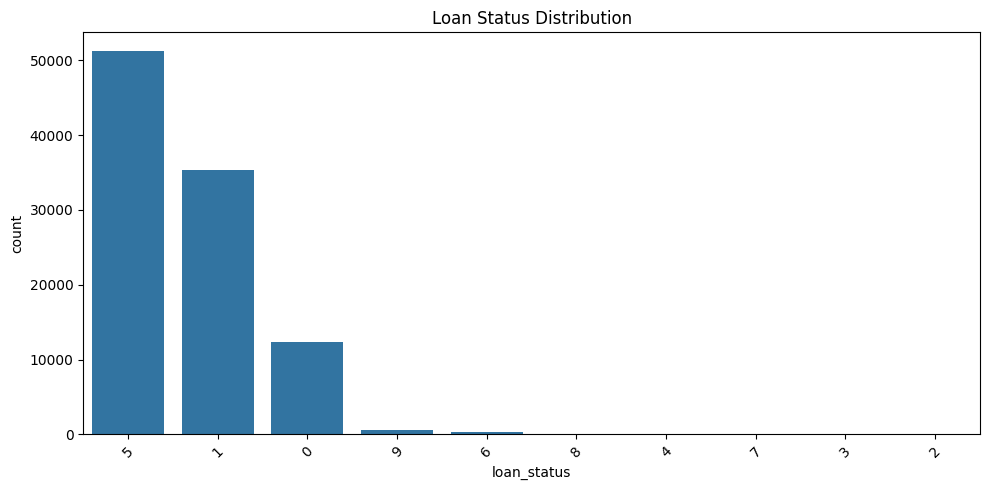

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Check for Target Symmetry & Class Imbalance

In [93]:
# Create binary target
df['target'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'] else 0)

# Drop "Current" loans for clarity
df_classified = df[~df['loan_status'].isin(['Current', 'In Grace Period'])]

# Check balance
print(df_classified['target'].value_counts())
print(df_classified['target'].value_counts(normalize=True) * 100)


target
0    100000
Name: count, dtype: int64
target
0    100.0
Name: proportion, dtype: float64


Visualize Binary Target

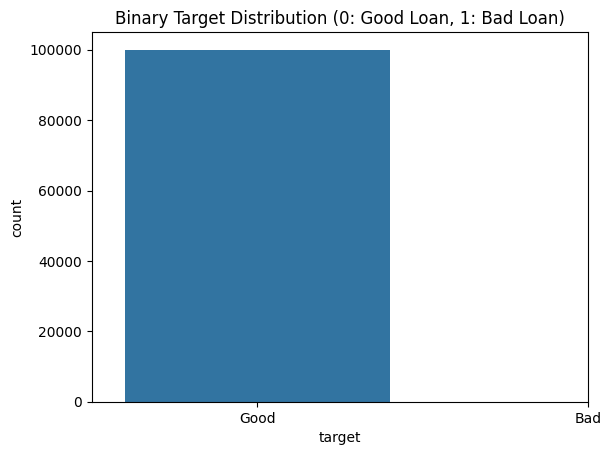

In [94]:
sns.countplot(data=df_classified, x='target')
plt.title('Binary Target Distribution (0: Good Loan, 1: Bad Loan)')
plt.xticks([0, 1], ['Good', 'Bad'])
plt.show()


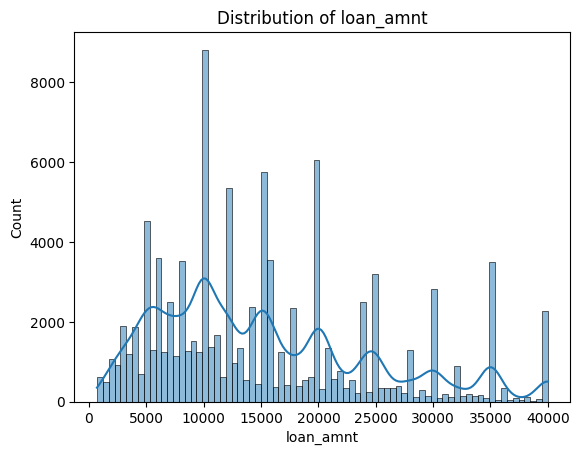

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot for one column
sns.histplot(df['loan_amnt'], kde=True)
plt.title('Distribution of loan_amnt')
plt.show()

 Skewness in Numeric Target (If Applicable)

In [95]:
from scipy.stats import skew

sk = skew(df['total_rec_prncp'].dropna())
print(f"Skewness: {sk:.2f}")

Skewness: 1.23


⚠️ Skewness: 1.23
This is right-skewed
Indicates a long tail of "bad" loans (if my target is default-like)
Could negatively affect models sensitive to distribution (e.g., linear regression, logistic regression)

# Using visualisation techniques (e.g., histograms, box , plots, scatter plots) and statistical analysis to explore relationships between the target variable and independent variables


Step 1: Setup

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Step 2: Numeric Variables vs Target

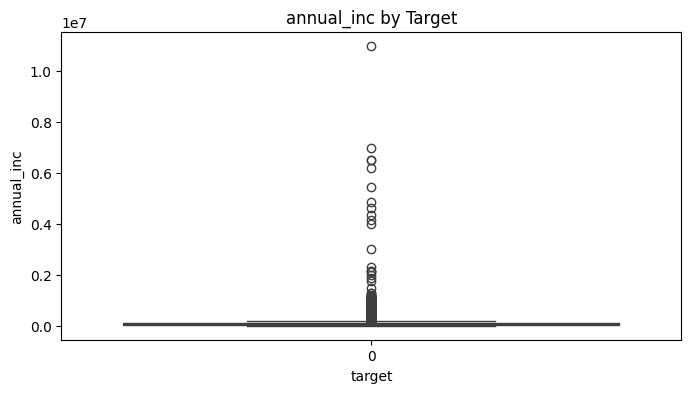

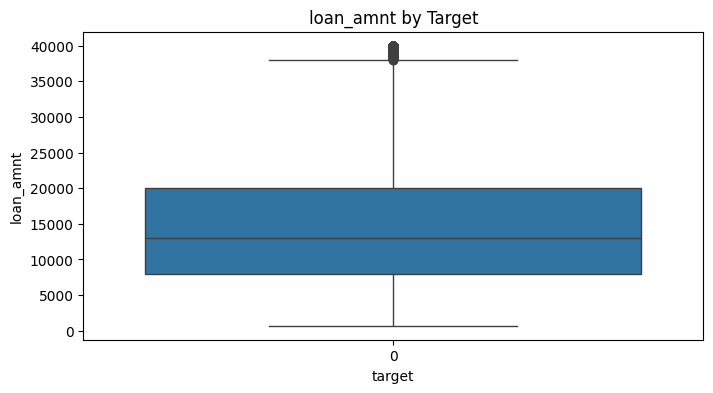

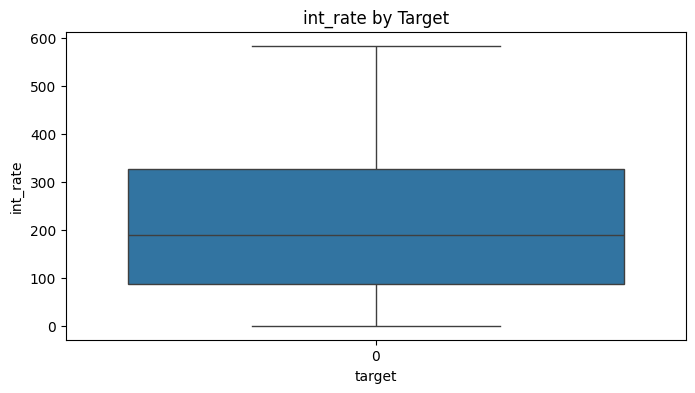

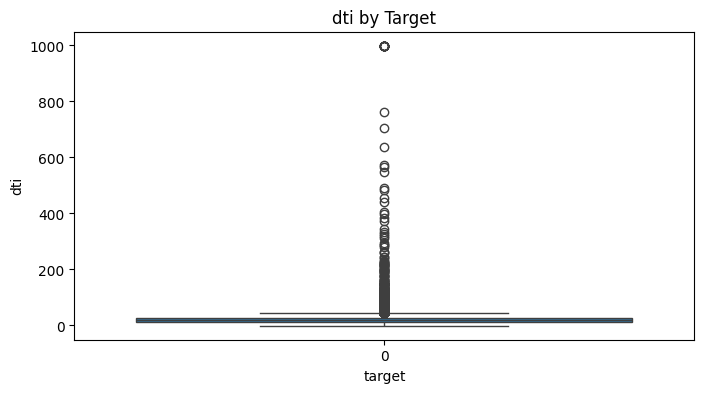

ValueError: List of boxplot statistics and `positions` values must have same the length

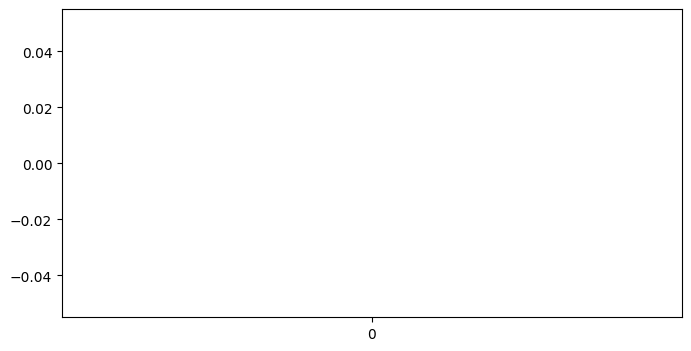

In [97]:
# Boxplots - Visualize how numeric variables differ across target values:
numerical_features = ['annual_inc', 'loan_amnt', 'int_rate', 'dti', 'revol_util']

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} by Target')
    plt.show()

B. Histograms (Separate by Target)

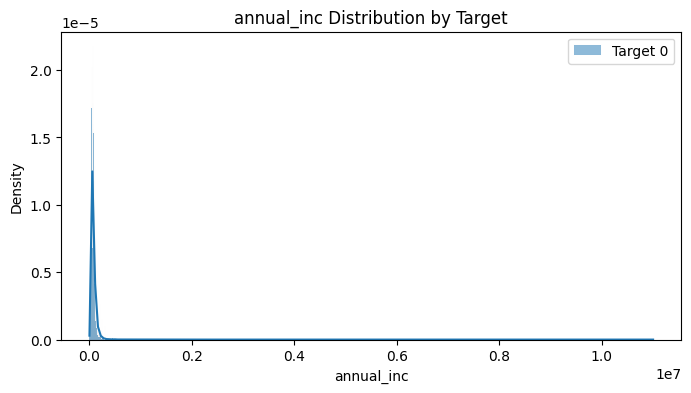

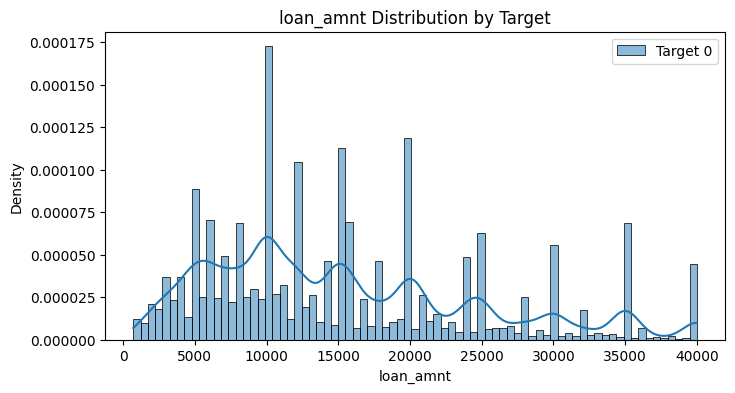

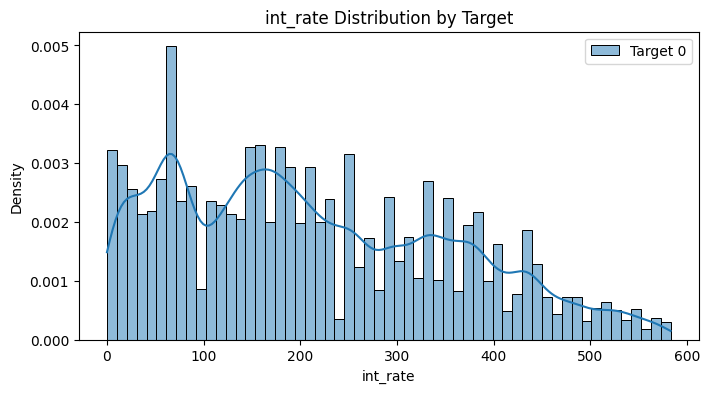

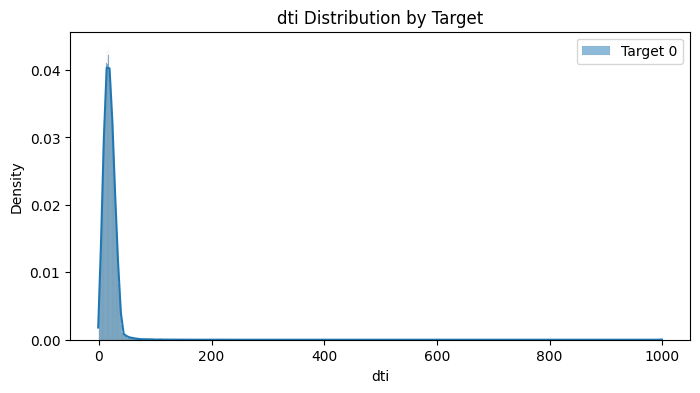

/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


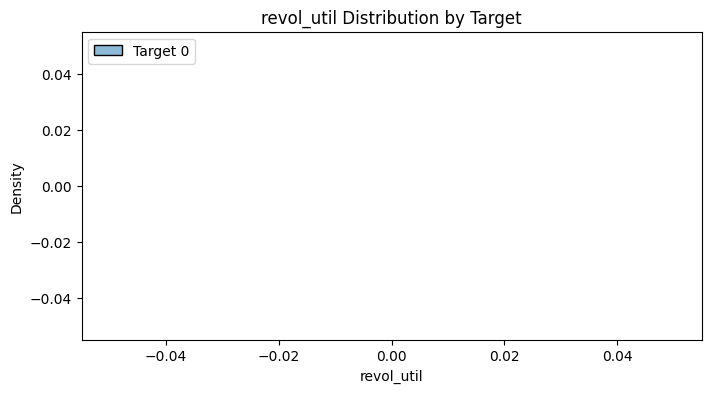

In [98]:
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    for label in df['target'].unique():
        sns.histplot(df[df['target'] == label][col], kde=True, label=f'Target {label}', stat="density", common_norm=False)
    plt.title(f'{col} Distribution by Target')
    plt.legend()
    plt.show()


C. Correlation with Numeric Target

In [99]:
correlation = df.corr(numeric_only=True)['target'].sort_values(ascending=False)
print("Correlation with target:\n", correlation)

Correlation with target:
 Unnamed: 0.1                                 NaN
Unnamed: 0                                   NaN
id                                           NaN
loan_amnt                                    NaN
funded_amnt                                  NaN
funded_amnt_inv                              NaN
term                                         NaN
int_rate                                     NaN
installment                                  NaN
grade                                        NaN
sub_grade                                    NaN
emp_title                                    NaN
emp_length                                   NaN
home_ownership                               NaN
annual_inc                                   NaN
verification_status                          NaN
loan_status                                  NaN
pymnt_plan                                   NaN
url                                          NaN
purpose                                    

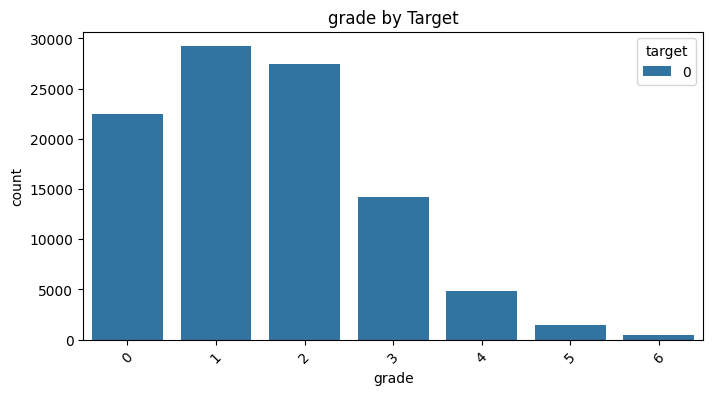

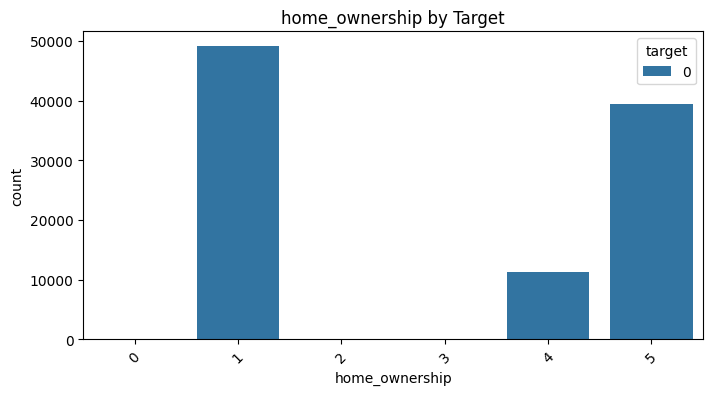

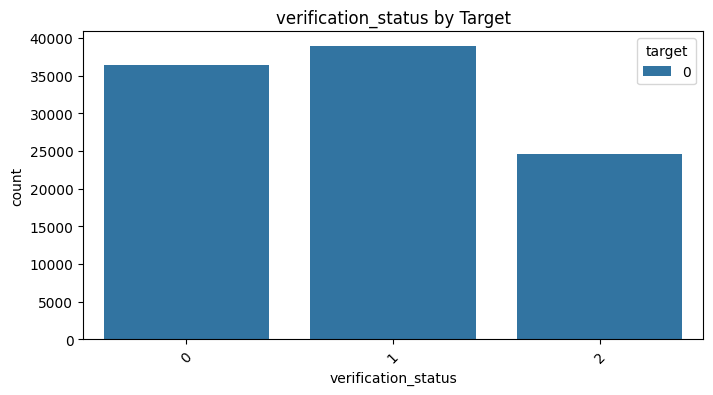

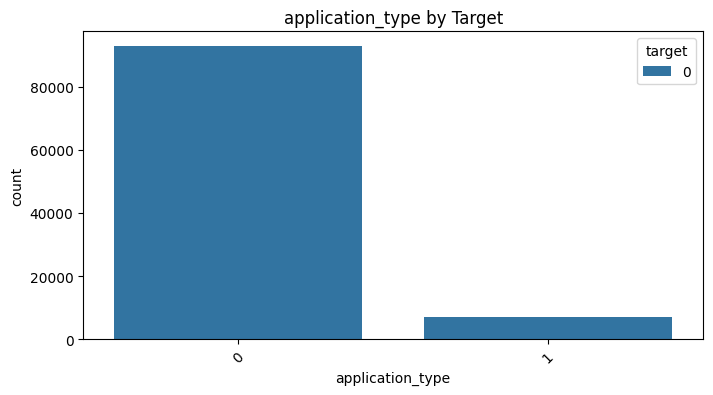

In [100]:
# Step 3: Categorical Variables vs Target
categorical_cols = ['grade', 'home_ownership', 'verification_status', 'application_type']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='target')
    plt.title(f'{col} by Target')
    plt.xticks(rotation=45)
    plt.show()

B. Stacked Bar Plot (Target Proportions)

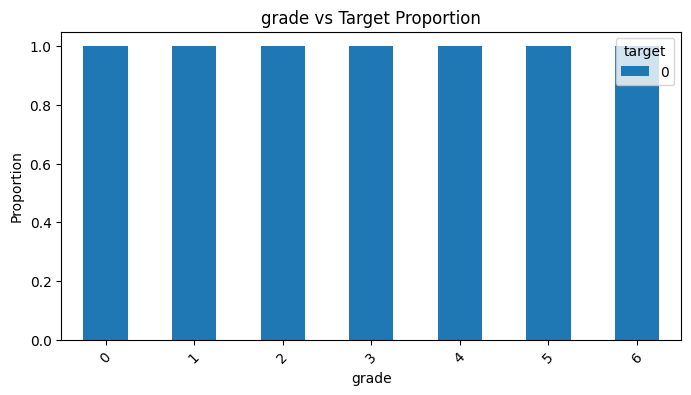

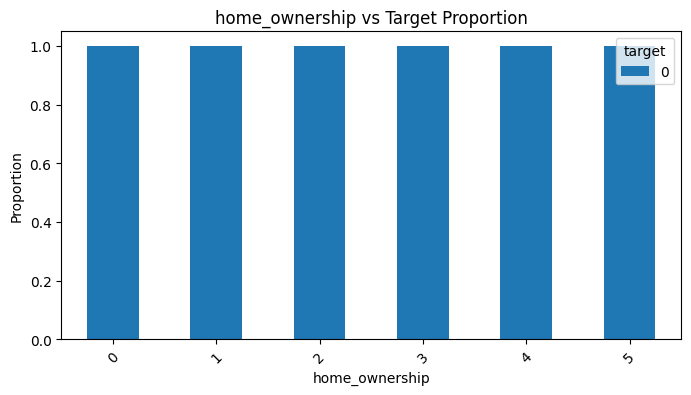

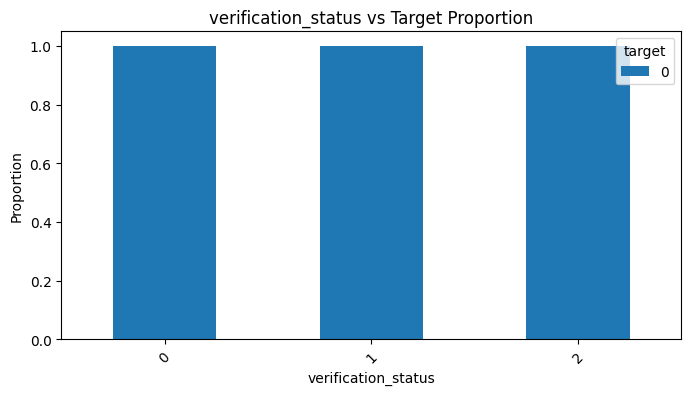

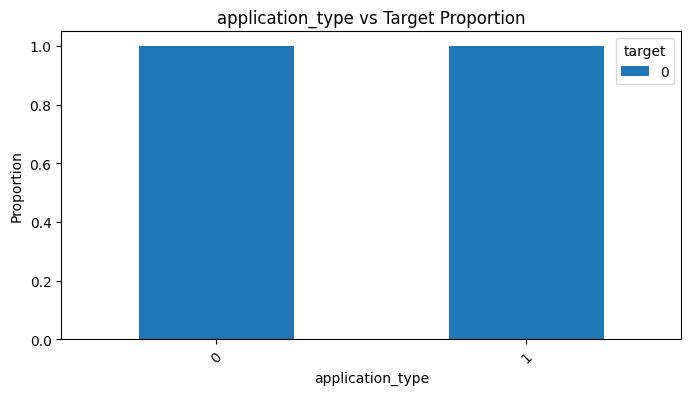

In [101]:
for col in categorical_cols:
    ctab = pd.crosstab(df[col], df['target'], normalize='index')
    ctab.plot(kind='bar', stacked=True, figsize=(8, 4), title=f'{col} vs Target Proportion')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()


Step 4: Scatter Plots (Interaction Effects)

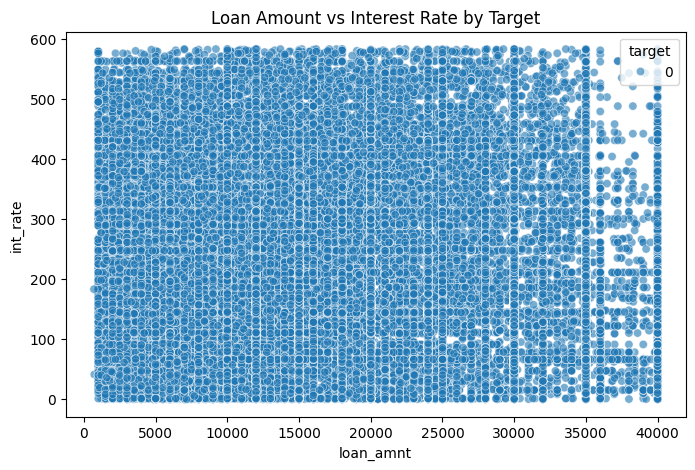

In [102]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='target', data=df, alpha=0.6)
plt.title('Loan Amount vs Interest Rate by Target')
plt.show()


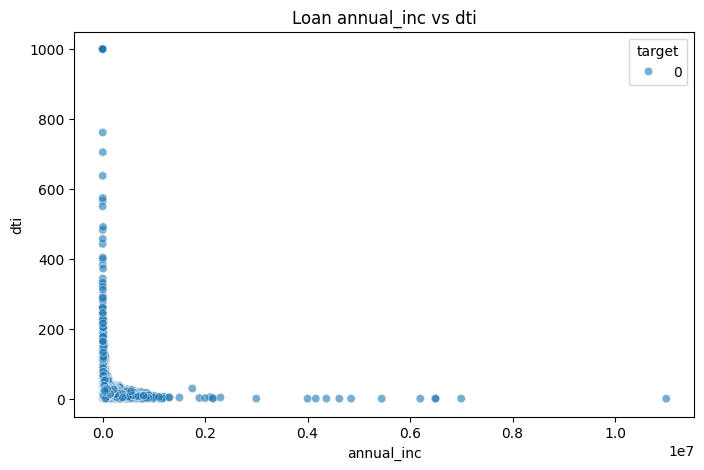

In [104]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='annual_inc', y='dti', hue='target', data=df, alpha=0.6)
plt.title('Loan annual_inc vs dti')
plt.show()


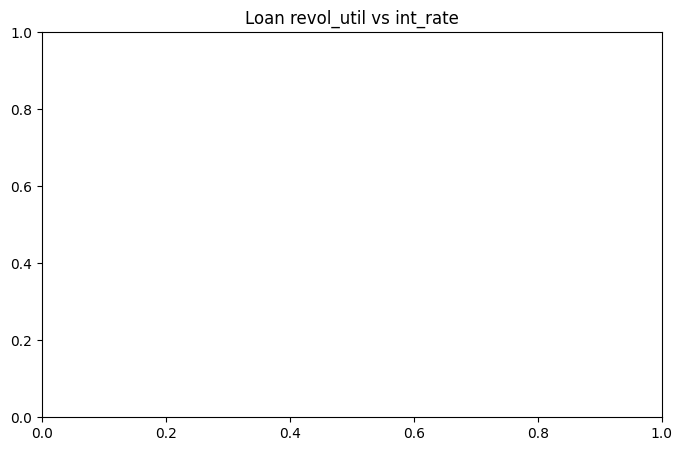

In [105]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='revol_util', y='int_rate', hue='target', data=df, alpha=0.6)
plt.title('Loan revol_util vs int_rate')
plt.show()



Step 5: Statistical Tests (Optional)

A. T-test or Mann-Whitney U (for numeric feature vs binary target)

In [110]:
group0_clean = group0.dropna()
group1_clean = group1.dropna()

if len(group0_clean) > 2 and len(group1_clean) > 2:
    t_stat, p_val = ttest_ind(group0_clean, group1_clean, equal_var=False)
    print(f"T-test for 'annual_inc': t-stat = {t_stat:.2f}, p = {p_val:.4f}")
else:
    print("❌ Not enough data in one or both groups for t-test.")

❌ Not enough data in one or both groups for t-test.


In [106]:
from scipy.stats import ttest_ind

group0 = df[df['target'] == 0]['annual_inc']
group1 = df[df['target'] == 1]['annual_inc']

t_stat, p_val = ttest_ind(group0.dropna(), group1.dropna(), equal_var=False)
print(f"T-test for 'annual_inc': t-stat = {t_stat:.2f}, p = {p_val:.4f}")


T-test for 'annual_inc': t-stat = nan, p = nan


<ipython-input-106-3d00a9350cc5>:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = ttest_ind(group0.dropna(), group1.dropna(), equal_var=False)


B. Chi-Square Test (for categorical vs target)

In [107]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['target'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test for {col}: p-value = {p:.4f}")


Chi-square test for grade: p-value = 1.0000
Chi-square test for home_ownership: p-value = 1.0000
Chi-square test for verification_status: p-value = 1.0000
Chi-square test for application_type: p-value = 1.0000


<!-- Exploratory Data Analysis
Conduct an in-depth analysis of the dataset with a focus
on the target variable. The analysis should include:
Exploring the distribution, symmetry, and potential issues
with the target variable -->